In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train=pd.read_csv('train_data.csv')
df_test=pd.read_csv('test_data.csv')
df=df_train
print(df_train.shape)
print(df_test.shape)

(184506, 122)
(123005, 121)


# Merging both test and train tables

In [3]:
#df=df_train.append(df_test)

In [4]:
df.shape

(184506, 122)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184506 entries, 0 to 184505
Columns: 122 entries, SK_ID_CURR to TARGET
dtypes: float64(65), int64(41), object(16)
memory usage: 171.7+ MB


In [6]:
df['TARGET'].value_counts()

0    169611
1     14895
Name: TARGET, dtype: int64

In [7]:
df.head(10)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,450407,Cash loans,F,N,Y,1,67500.0,227520.0,11065.5,180000.0,...,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0,0
1,271298,Cash loans,M,Y,Y,1,247500.0,1882372.5,65560.5,1719000.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0,0
2,122238,Cash loans,M,Y,Y,1,180000.0,101880.0,10827.0,90000.0,...,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0,0
3,305311,Cash loans,M,N,N,0,81000.0,405000.0,20677.5,405000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0
4,414121,Cash loans,F,N,Y,0,157500.0,888840.0,29506.5,675000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0
5,188073,Cash loans,M,Y,Y,0,202500.0,1350000.0,64948.5,1350000.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
6,123261,Cash loans,F,N,Y,0,180000.0,1113840.0,44302.5,900000.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,6.0,0
7,103883,Cash loans,F,N,Y,0,103500.0,45000.0,4738.5,45000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,0
8,169250,Cash loans,F,N,Y,0,157500.0,728460.0,38938.5,675000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,105040,Cash loans,M,Y,N,0,90000.0,1078200.0,31653.0,900000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0


## Handling categoriacal feature CODE_GENDER


In [8]:
df['CODE_GENDER']

0         F
1         M
2         M
3         M
4         F
         ..
184501    F
184502    F
184503    F
184504    F
184505    F
Name: CODE_GENDER, Length: 184506, dtype: object

In [9]:
df['CODE_GENDER'].value_counts()

F      121357
M       63147
XNA         2
Name: CODE_GENDER, dtype: int64

<AxesSubplot:>

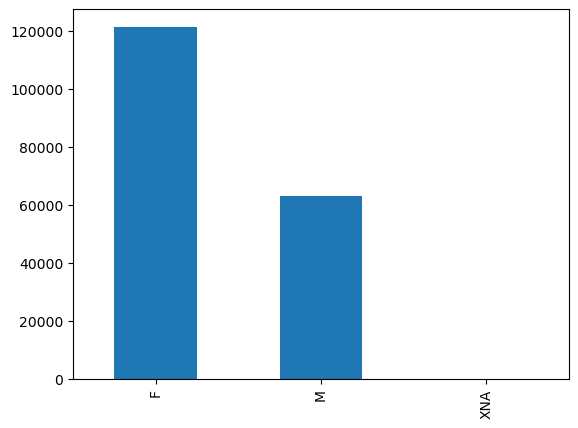

In [10]:
df['CODE_GENDER'].value_counts().plot(kind='bar')

## we can observe that females are the ones who have taken the most of the loan as compared with men

## females are the one who are taking a lot of loan and maybe are defaulters as well!

In [11]:
df['CODE_GENDER']=df['CODE_GENDER'].map({'F':0,'M':1,'XNA':2})

In [12]:
df

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,450407,Cash loans,0,N,Y,1,67500.0,227520.0,11065.5,180000.0,...,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0,0
1,271298,Cash loans,1,Y,Y,1,247500.0,1882372.5,65560.5,1719000.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0,0
2,122238,Cash loans,1,Y,Y,1,180000.0,101880.0,10827.0,90000.0,...,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0,0
3,305311,Cash loans,1,N,N,0,81000.0,405000.0,20677.5,405000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0
4,414121,Cash loans,0,N,Y,0,157500.0,888840.0,29506.5,675000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184501,439663,Cash loans,0,N,Y,1,135000.0,143910.0,15498.0,135000.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
184502,385689,Revolving loans,0,N,Y,0,202500.0,360000.0,18000.0,360000.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0
184503,153567,Cash loans,0,N,N,0,135000.0,900000.0,45954.0,900000.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
184504,365526,Cash loans,0,N,Y,0,123300.0,744988.5,20484.0,744988.5,...,0,0,0,0.0,0.0,0.0,4.0,0.0,2.0,0


## Handling Categorical Feature FLAG_QWN_CAR

In [13]:
df['FLAG_OWN_CAR'].value_counts()  ## counting the number of unique values

N    121630
Y     62876
Name: FLAG_OWN_CAR, dtype: int64

In [14]:
df['FLAG_OWN_CAR'].isna().sum()  ## there are no null values in this column

0

<AxesSubplot:>

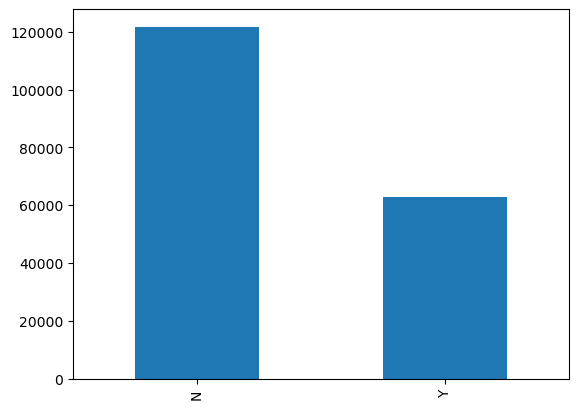

In [15]:
df['FLAG_OWN_CAR'].value_counts().plot(kind='bar')

## Here we can observe that most of the people who have taken loan doesnot have the car

In [16]:
df['FLAG_OWN_CAR']=df['FLAG_OWN_CAR'].map({'N':0,'Y':1})

In [17]:
df

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,450407,Cash loans,0,0,Y,1,67500.0,227520.0,11065.5,180000.0,...,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0,0
1,271298,Cash loans,1,1,Y,1,247500.0,1882372.5,65560.5,1719000.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0,0
2,122238,Cash loans,1,1,Y,1,180000.0,101880.0,10827.0,90000.0,...,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0,0
3,305311,Cash loans,1,0,N,0,81000.0,405000.0,20677.5,405000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0
4,414121,Cash loans,0,0,Y,0,157500.0,888840.0,29506.5,675000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184501,439663,Cash loans,0,0,Y,1,135000.0,143910.0,15498.0,135000.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
184502,385689,Revolving loans,0,0,Y,0,202500.0,360000.0,18000.0,360000.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0
184503,153567,Cash loans,0,0,N,0,135000.0,900000.0,45954.0,900000.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
184504,365526,Cash loans,0,0,Y,0,123300.0,744988.5,20484.0,744988.5,...,0,0,0,0.0,0.0,0.0,4.0,0.0,2.0,0


## Handling categorical feature FLAG_OWN_REALTY

In [18]:
df['FLAG_OWN_REALTY'].value_counts()

Y    128059
N     56447
Name: FLAG_OWN_REALTY, dtype: int64

In [19]:
df['FLAG_OWN_REALTY'].isna().sum()  ## there are no null values in this column

0

<AxesSubplot:>

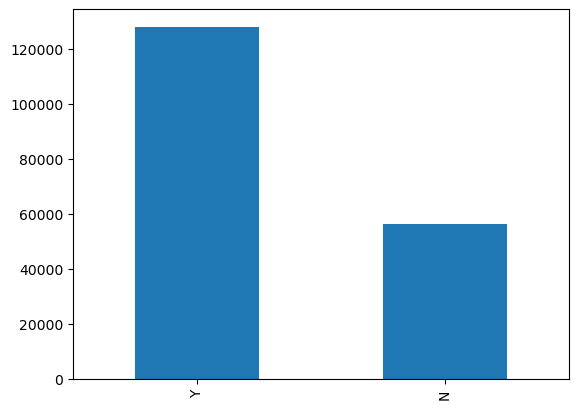

In [20]:
df['FLAG_OWN_REALTY'].value_counts().plot(kind='bar')

## here we can observe that most of the people taking loan own a property and very few are without a property

In [21]:
df['FLAG_OWN_REALTY']=df['FLAG_OWN_REALTY'].map({'N':0,'Y':1})

In [22]:
df

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,450407,Cash loans,0,0,1,1,67500.0,227520.0,11065.5,180000.0,...,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0,0
1,271298,Cash loans,1,1,1,1,247500.0,1882372.5,65560.5,1719000.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0,0
2,122238,Cash loans,1,1,1,1,180000.0,101880.0,10827.0,90000.0,...,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0,0
3,305311,Cash loans,1,0,0,0,81000.0,405000.0,20677.5,405000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0
4,414121,Cash loans,0,0,1,0,157500.0,888840.0,29506.5,675000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184501,439663,Cash loans,0,0,1,1,135000.0,143910.0,15498.0,135000.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
184502,385689,Revolving loans,0,0,1,0,202500.0,360000.0,18000.0,360000.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0
184503,153567,Cash loans,0,0,0,0,135000.0,900000.0,45954.0,900000.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
184504,365526,Cash loans,0,0,1,0,123300.0,744988.5,20484.0,744988.5,...,0,0,0,0.0,0.0,0.0,4.0,0.0,2.0,0


In [23]:
df.info()

## we have handled here 3 categorical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184506 entries, 0 to 184505
Columns: 122 entries, SK_ID_CURR to TARGET
dtypes: float64(65), int64(44), object(13)
memory usage: 171.7+ MB


In [24]:
for col in df:
    if(df[col].dtype=='object'):
        print(col)

NAME_CONTRACT_TYPE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
OCCUPATION_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE
FONDKAPREMONT_MODE
HOUSETYPE_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE


## Here we can observe that there are 13 categorical columns left to be handled

## Handling categorical feature NAME_CONTRACT_TYPE

In [25]:
df['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         167013
Revolving loans     17493
Name: NAME_CONTRACT_TYPE, dtype: int64

In [26]:
df['NAME_CONTRACT_TYPE'].isna().sum() ## here we dont have any null values

0

<AxesSubplot:>

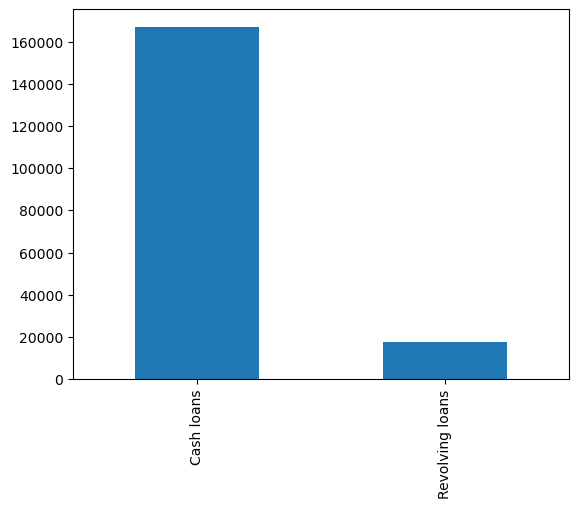

In [27]:
df['NAME_CONTRACT_TYPE'].value_counts().plot(kind='bar')

## we can observe that most of the peope have taken cash loans and very few have taken revolving loan

In [28]:
## we will perform one hot encoding on this column

In [29]:
df_1=pd.get_dummies(df['NAME_CONTRACT_TYPE'],drop_first=True)
df_1

,Revolving loans
0,0
1,0
2,0
3,0
4,0
...,...
184501,0
184502,1
184503,0
184504,0


In [30]:
df=pd.concat([df,df_1],axis=1)

In [31]:
df.shape

(184506, 123)

In [32]:
df.drop('NAME_CONTRACT_TYPE',axis=1,inplace=True)  

## here we have dropped the 'NAME_CONTRACT_TYPE' column because we already have the one hot encoded column


In [33]:
df.shape

(184506, 122)

## Handling categorical feature NAME_TYPE_SUITE

In [34]:
df['NAME_TYPE_SUITE'].value_counts()
## this column tells who accompanied client while he/she went to apply for loan
## this information is not much relevant to our model so we can drop this column

Unaccompanied      149059
Family              24044
Spouse, partner      6869
Children             1982
Other_B              1081
Other_A               528
Group of people       173
Name: NAME_TYPE_SUITE, dtype: int64

<AxesSubplot:>

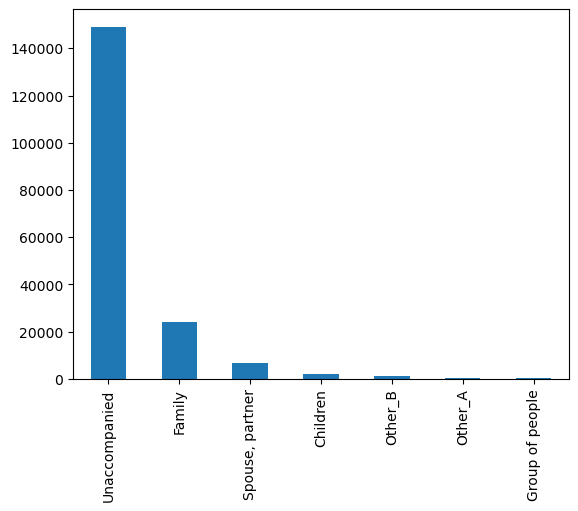

In [35]:
df['NAME_TYPE_SUITE'].value_counts().plot(kind='bar')

## Not much relevant information to our model so we can drop this column

In [36]:
df.drop('NAME_TYPE_SUITE',axis=1,inplace=True)  ## here we dropped this column

## Handling categorical feature NAME_INCOME_TYPE

In [37]:
df['NAME_INCOME_TYPE'].value_counts() 
## this column is essential because loan is provided based on income

Working                 95302
Commercial associate    42967
Pensioner               33227
State servant           12981
Unemployed                 15
Student                     6
Businessman                 6
Maternity leave             2
Name: NAME_INCOME_TYPE, dtype: int64

In [38]:
df['NAME_INCOME_TYPE'].isna().sum()
## there are no null values here

0

<AxesSubplot:>

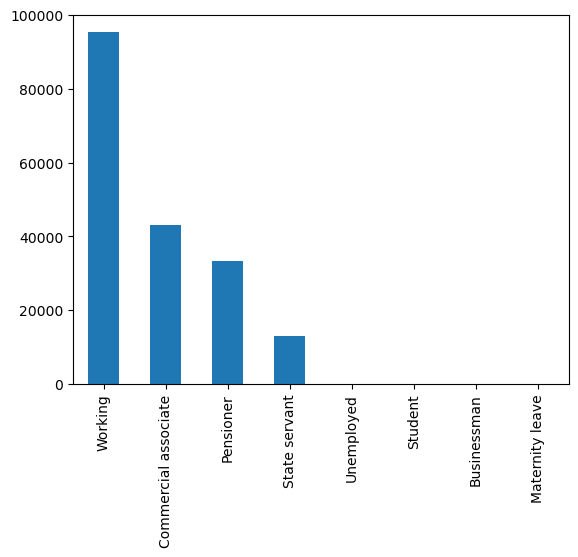

In [39]:
df['NAME_INCOME_TYPE'].value_counts().plot(kind='bar')

## Here we can observe that most of the people who take loan are working professionals followed by commercial associate followed by Pensioner -- State servant --Unemployed--Student--Businessman--Maternity leave

In [40]:
## we will perform one hot encoding

df_2=pd.get_dummies(df['NAME_INCOME_TYPE'],drop_first=True)
df_2

,Commercial associate,Maternity leave,Pensioner,State servant,Student,Unemployed,Working
0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
184501,0,0,0,0,0,0,1
184502,0,0,1,0,0,0,0
184503,1,0,0,0,0,0,0
184504,0,0,1,0,0,0,0


In [41]:
## merging the above table with original table

df=pd.concat([df,df_2],axis=1)

## now we will drop the 'NAME_INCOME_TYPE' column

In [42]:
df.drop('NAME_INCOME_TYPE',axis=1,inplace=True)

In [43]:
df.shape

(184506, 127)

## Handling categorical feature NAME_EDUCATION_TYPE

In [44]:
df['NAME_EDUCATION_TYPE'].value_counts()  ## level of highest education the client has achieved

Secondary / secondary special    131092
Higher education                  44810
Incomplete higher                  6179
Lower secondary                    2322
Academic degree                     103
Name: NAME_EDUCATION_TYPE, dtype: int64

In [45]:
df['NAME_EDUCATION_TYPE'].isna().sum() ## there are no null values in this column

0

<AxesSubplot:>

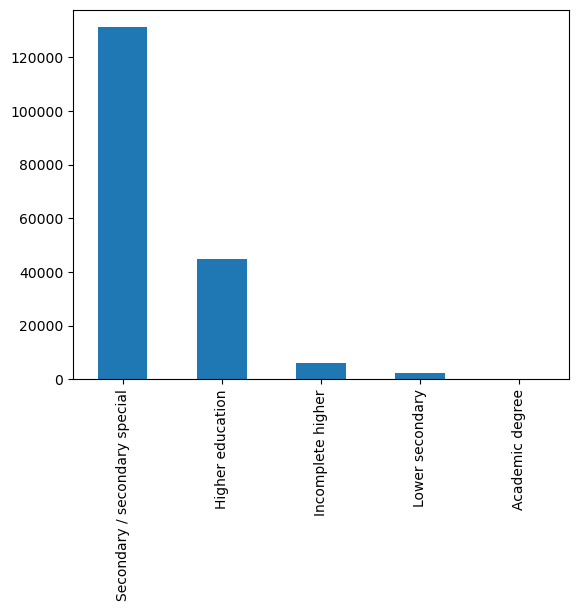

In [46]:
df['NAME_EDUCATION_TYPE'].value_counts().plot(kind='bar')

## We can observer that most of clients who took loan have secondary/secondary sepecial education qualification. But we don't have to do anything with the education qualification of the client , so we will drop this column.

In [47]:
df.drop('NAME_EDUCATION_TYPE',axis=1,inplace=True) ## dropped the column

## Handling categorical feature NAME_FAMILY_STATUS

In [48]:
df['NAME_FAMILY_STATUS'].value_counts()  ##gives the family status of the client

Married                 117746
Single / not married     27130
Civil marriage           18094
Separated                11904
Widow                     9631
Unknown                      1
Name: NAME_FAMILY_STATUS, dtype: int64

In [49]:
df['NAME_FAMILY_STATUS'].isna().sum() ## there are no null values

0

In [50]:
df.drop('NAME_FAMILY_STATUS',axis=1,inplace=True) 
## decided to drop this column 

In [51]:
df.shape

(184506, 125)

## Handling categorical feature NAME_HOUSING_TYPE

<AxesSubplot:>

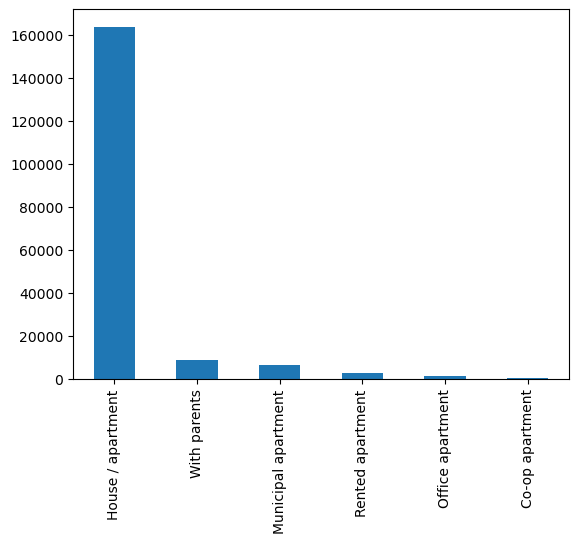

In [52]:
df['NAME_HOUSING_TYPE'].value_counts().plot(kind='bar')

## We can see that most of the clients who applied for loan own House/apartment and there are very less clients with co-op apartment who applied for loan

In [53]:
df['NAME_HOUSING_TYPE'].isna().sum()  ## there are no null values in this column

0

In [54]:
## we will one hot encode this column because it kind of represents the status of client

df_2=pd.get_dummies(df['NAME_HOUSING_TYPE'],drop_first=True)
df_2

,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,1
4,1,0,0,0,0
...,...,...,...,...,...
184501,1,0,0,0,0
184502,1,0,0,0,0
184503,0,0,0,0,1
184504,1,0,0,0,0


In [55]:
df=pd.concat([df,df_2],axis=1)

In [56]:
df.drop('NAME_HOUSING_TYPE',axis=1,inplace=True)

In [57]:
df.shape

(184506, 129)

## Handling categorical feature OCCUPATION_TYPE

<AxesSubplot:>

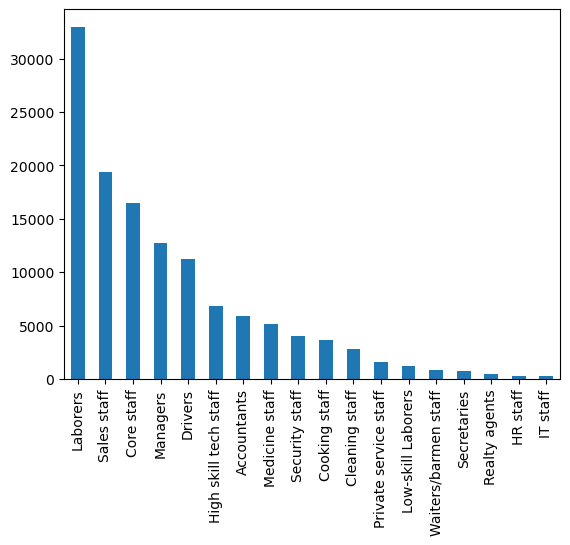

In [58]:
df['OCCUPATION_TYPE'].value_counts().plot(kind='bar')

## Most of the people who took loan are laborers

In [59]:
df['OCCUPATION_TYPE'].isna().sum()  ## there are 96391 NULL values in this column

57867

In [60]:
df_2=pd.get_dummies(df['OCCUPATION_TYPE'],drop_first=True)
df=pd.concat([df,df_2],axis=1)
df.drop('OCCUPATION_TYPE',axis=1,inplace=True)


## we performed one hot encoding on this column 

In [61]:
df.shape

(184506, 145)

## Handling categorical feature 'WEEKDAY_APPR_PROCESS_START'

<AxesSubplot:>

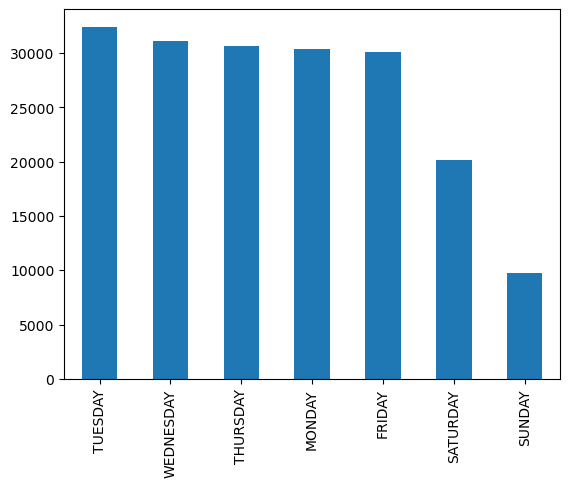

In [62]:
df['WEEKDAY_APPR_PROCESS_START'].value_counts().plot(kind='bar')

## we cab observe that the most of the clients applied for loan was on Tuesday, this data is totally irrelevant to our model so we will drop this column

In [63]:
df.drop('WEEKDAY_APPR_PROCESS_START',axis=1,inplace=True)

 ## Handling categorical feature ORGANIZATION_TYPE

In [64]:
df['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    40943
XNA                       33236
Self-employed             22877
Other                      9961
Medicine                   6752
Business Entity Type 2     6332
Government                 6225
School                     5303
Trade: type 7              4692
Kindergarten               4150
Construction               4075
Business Entity Type 1     3529
Transport: type 4          3228
Trade: type 3              2093
Industry: type 3           2011
Security                   1993
Industry: type 9           1983
Housing                    1786
Industry: type 11          1613
Military                   1548
Bank                       1493
Agriculture                1439
Police                     1406
Transport: type 2          1347
Postal                     1311
Security Ministries        1205
Trade: type 2              1200
Restaurant                 1094
Services                    944
University                  793
Industry: type 7            777
Transpor

In [65]:
df['ORGANIZATION_TYPE'].isna().sum() ## there are no null values

0

In [66]:
df_2=pd.get_dummies(df['ORGANIZATION_TYPE'],drop_first=True)
df_2

,Agriculture,Bank,Business Entity Type 1,Business Entity Type 2,Business Entity Type 3,Cleaning,Construction,Culture,Electricity,Emergency,...,Trade: type 4,Trade: type 5,Trade: type 6,Trade: type 7,Transport: type 1,Transport: type 2,Transport: type 3,Transport: type 4,University,XNA
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184501,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
184502,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
184503,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
184504,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [67]:
df=pd.concat([df,df_2],axis=1)

In [68]:
df.drop('ORGANIZATION_TYPE',axis=1,inplace=True)

In [69]:
df.shape

(184506, 200)

## Handling categorical feature FONDKAPREMONT_MODE


<AxesSubplot:>

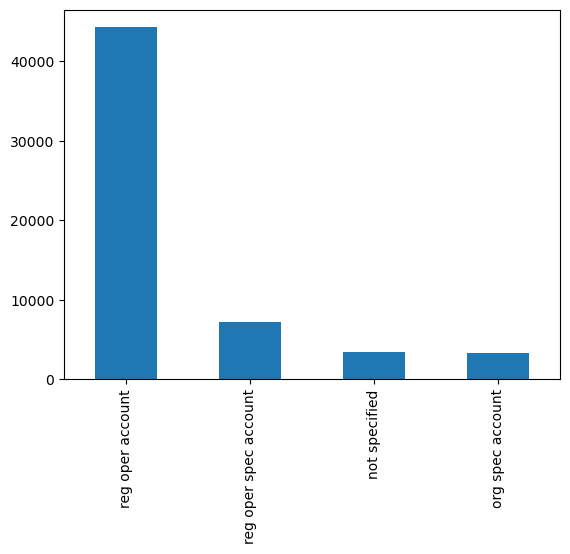

In [70]:
df['FONDKAPREMONT_MODE'].value_counts().plot(kind='bar')

In [71]:
df['FONDKAPREMONT_MODE'].isna().sum()
## there are about 2 lakh null values in this column

126254

In [72]:
df_2=pd.get_dummies(df['FONDKAPREMONT_MODE'],drop_first=True)
df_2

,org spec account,reg oper account,reg oper spec account
0,0,0,0
1,0,0,0
2,0,1,0
3,0,0,0
4,0,0,0
...,...,...,...
184501,0,0,0
184502,0,1,0
184503,0,0,0
184504,0,0,0


In [73]:
df=pd.concat([df,df_2],axis=1)
df.drop('FONDKAPREMONT_MODE',axis=1,inplace=True)

## we were not sure about this data so we performed one hot encoding

In [74]:
df.shape

(184506, 202)

## Handling categorical feature HOUSETYPE_MODE

<AxesSubplot:>

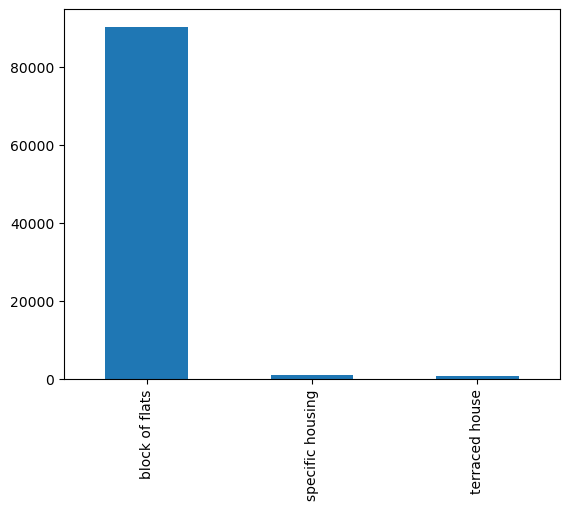

In [75]:
df['HOUSETYPE_MODE'].value_counts().plot(kind='bar')

## we can observe that most of the clients own block of flats and very less own specific housing or terraced house, also this data can be of use in case of loan.

In [76]:
df['HOUSETYPE_MODE'].isna().sum()
## we can observe that this column contains about 1.5 lakhs of null values

92482

In [77]:
df_2=pd.get_dummies(df['HOUSETYPE_MODE'],drop_first=True)
df=pd.concat([df,df_2],axis=1)
df.drop('HOUSETYPE_MODE',axis=1,inplace=True)

## we performed one hot encoding on this data

In [78]:
df.shape

(184506, 203)

## Handling categorical feature WALLSMATERIAL_MODE

<AxesSubplot:>

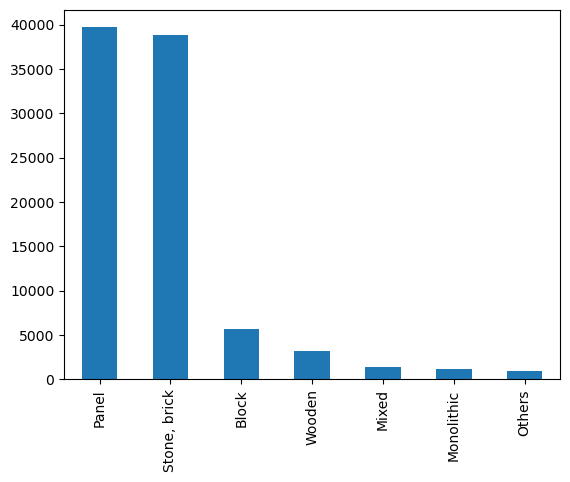

In [79]:
df['WALLSMATERIAL_MODE'].value_counts().plot(kind='bar')

## It seems like this is a way too irrelevant data , like why will there be a need for walls material for loan!

In [80]:
df.drop('WALLSMATERIAL_MODE',axis=1,inplace=True)
## we decided to drop this column

In [81]:
df.shape

(184506, 202)

## Handling categorical feature EMERGENCYSTATE_MODE

<AxesSubplot:>

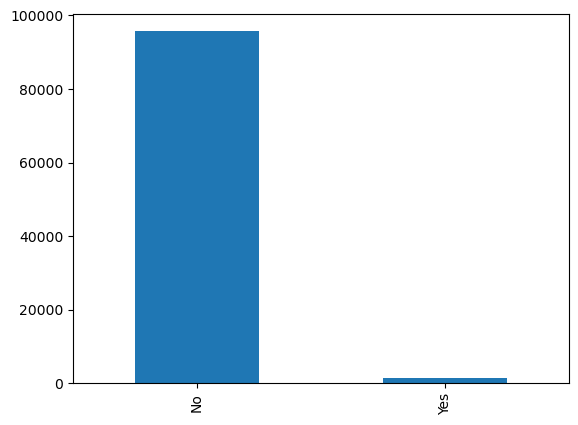

In [82]:
df['EMERGENCYSTATE_MODE'].value_counts().plot(kind='bar')

In [83]:
## checking for null values

df['EMERGENCYSTATE_MODE'].isna().sum()

## there are around 1.45 lakhs null values in this column

87336

## dropping this column won't affect much on our model so we drop this column

In [84]:
df.drop('EMERGENCYSTATE_MODE',axis=1,inplace=True)

In [85]:
df.shape

(184506, 201)

## All the categorical features are taken care of


In [86]:
df.head()

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,Transport: type 2,Transport: type 3,Transport: type 4,University,XNA,org spec account,reg oper account,reg oper spec account,specific housing,terraced house
0,450407,0,0,1,1,67500.0,227520.0,11065.5,180000.0,0.018634,...,0,0,0,0,0,0,0,0,0,0
1,271298,1,1,1,1,247500.0,1882372.5,65560.5,1719000.0,0.018850,...,0,0,0,0,0,0,0,0,0,0
2,122238,1,1,1,1,180000.0,101880.0,10827.0,90000.0,0.022625,...,0,0,1,0,0,0,1,0,0,0
3,305311,1,0,0,0,81000.0,405000.0,20677.5,405000.0,0.035792,...,0,0,0,0,0,0,0,0,0,0
4,414121,0,0,1,0,157500.0,888840.0,29506.5,675000.0,0.018801,...,0,0,0,0,0,0,0,0,0,0


## If we drop the column SK_ID_CURR it won't affect out model

In [87]:
df.drop('SK_ID_CURR',axis=1,inplace=True)

In [88]:
for col in df:
    if(df[col].isna().sum()>90000):
        print(col)

## We observe that there are 9 columns having missing value percent > 70, so we can drop these columns

OWN_CAR_AGE
EXT_SOURCE_1
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BUILD_MODE
COMMONAREA_MODE
ELEVATORS_MODE
ENTRANCES_MODE
FLOORSMAX_MODE
FLOORSMIN_MODE
LANDAREA_MODE
LIVINGAPARTMENTS_MODE
LIVINGAREA_MODE
NONLIVINGAPARTMENTS_MODE
NONLIVINGAREA_MODE
APARTMENTS_MEDI
BASEMENTAREA_MEDI
YEARS_BUILD_MEDI
COMMONAREA_MEDI
ELEVATORS_MEDI
ENTRANCES_MEDI
FLOORSMAX_MEDI
FLOORSMIN_MEDI
LANDAREA_MEDI
LIVINGAPARTMENTS_MEDI
LIVINGAREA_MEDI
NONLIVINGAPARTMENTS_MEDI
NONLIVINGAREA_MEDI


In [89]:
for col in df:
    if(df[col].isna().sum()>90000):
        df.drop(col,axis=1,inplace=True)



In [90]:
df.shape

(184506, 159)

## Dealing with NULL values

In [91]:
## finding columns with null values
count=0
for col in df:
    if(df[col].isna().sum()>0):
        print(col)
        count+=1
print(count)

AMT_ANNUITY
AMT_GOODS_PRICE
CNT_FAM_MEMBERS
EXT_SOURCE_2
EXT_SOURCE_3
YEARS_BEGINEXPLUATATION_AVG
YEARS_BEGINEXPLUATATION_MODE
YEARS_BEGINEXPLUATATION_MEDI
TOTALAREA_MODE
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
DAYS_LAST_PHONE_CHANGE
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_YEAR
20


## We observe that there are 53 columns including the TARGET having null values, so we have 3 choices to fill the null values for these columns.
## What we think is to fill the null values of those columns having only two unique values with mode and remaining with mean or median.

## 1) Filling the null value of columns having two or three unique values with mode

In [92]:
for col in df:
    if(df[col].isna().sum()==2 or df[col].isna().sum()==3):
        df.fillna(df[col].mode()[0],inplace=True)
        
## we have filled those columns null value with mode which had 2 or 3 null values

## 2) Filling the remaining columns null values with median inorder to handle outliers

In [93]:
for col in df:
    if(df[col].isna().sum()>0):
        df.fillna(df[col].median(),inplace=True)
        
## we have filled the remaining columns null value with their median

In [94]:
count=0
for col in df:
    if(df[col].isna().sum()>0):
        count+=1
        
print(count)

0


## There are no null values in our data now.

# Dealing with outliers

In [95]:
df['AMT_INCOME_TOTAL'].describe()

count    1.845060e+05
mean     1.689985e+05
std      2.942453e+05
min      2.610000e+04
25%      1.125000e+05
50%      1.485000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

/home/nitin/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

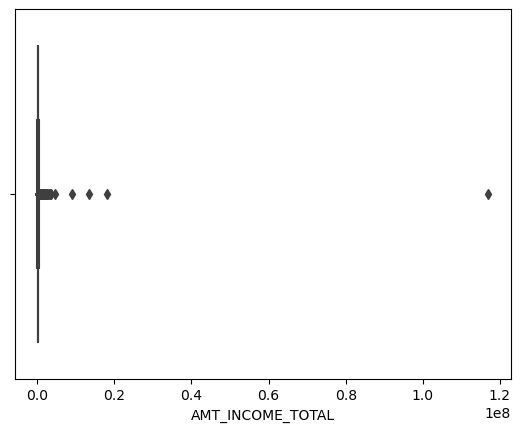

In [96]:
sns.boxplot(df['AMT_INCOME_TOTAL'])

## we observe that there are a lot of outliers in this column

/home/nitin/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

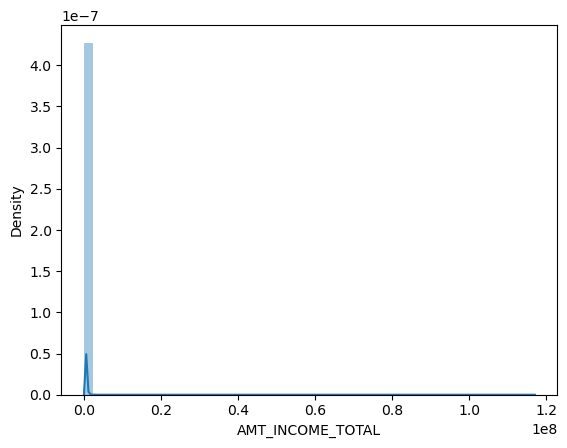

In [97]:
sns.distplot(df['AMT_INCOME_TOTAL'])

In [98]:
## the data is highly skewed and also we can see in the box plot there are outliers after the max value range 
## we deal with those outliers using the percentile method

In [99]:
lower_limit=df['AMT_INCOME_TOTAL'].quantile(0.01)
upper_limit=df['AMT_INCOME_TOTAL'].quantile(0.95)

# percentile25=df['AMT_INCOME_TOTAL'].quantile(0.25)
# percentile75=df['AMT_INCOME_TOTAL'].quantile(0.75)

# iqr=percentile75-percentile25

# lower_limit=percentile75+1.5*iqr
# upper_limit=percentile25-1.5*iqr
print(lower_limit)
print(upper_limit)
df['AMT_INCOME_TOTAL'].max()

45000.0
337500.0


117000000.0

In [100]:
df['AMT_INCOME_TOTAL']=np.where(df['AMT_INCOME_TOTAL']>=upper_limit,upper_limit,
                               np.where(df['AMT_INCOME_TOTAL']<=lower_limit,lower_limit,df['AMT_INCOME_TOTAL']))

/home/nitin/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

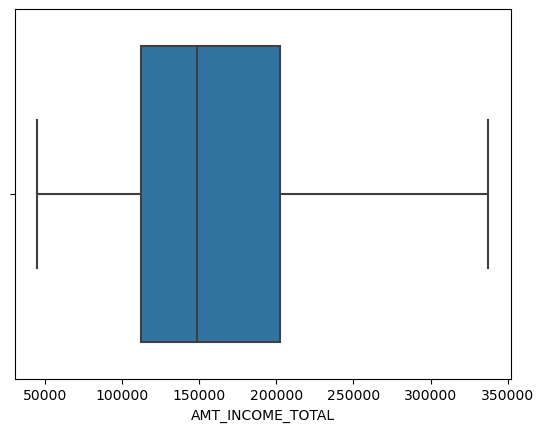

In [101]:
sns.boxplot(df['AMT_INCOME_TOTAL'])



## We  observe that outliers are removed from the 'AMT_INCOME_TOTAL' column

/home/nitin/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

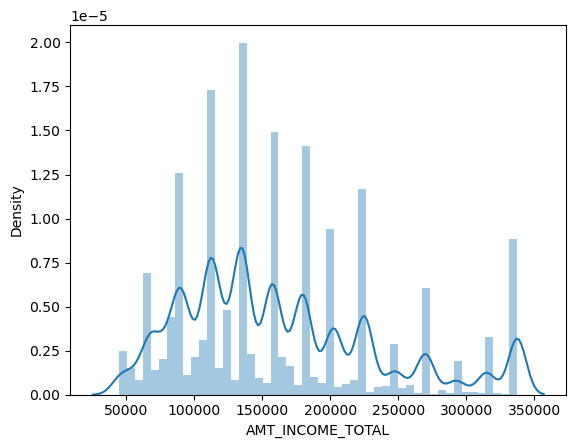

In [102]:
sns.distplot(df['AMT_INCOME_TOTAL'])

In [103]:
df['AMT_INCOME_TOTAL'].describe()

count    184506.000000
mean     162668.815005
std       73157.827152
min       45000.000000
25%      112500.000000
50%      148500.000000
75%      202500.000000
max      337500.000000
Name: AMT_INCOME_TOTAL, dtype: float64

## In the similar way we remove outliers for remaining columns.

In [104]:
## Applying the percentile method for every column to manage the outliers

for col in df:
    if(col!='AMT_INCOME_TOTAL'):
        lower_limit=df[col].quantile(0.01)
        upper_limit=df[col].quantile(0.95)
        
        df[col]=np.where(df[col]>=upper_limit,upper_limit,
                        np.where(df[col]<=lower_limit,lower_limit,df[col]))
        
      

## Outliers are removed 

In [105]:
df.head(5)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,Transport: type 2,Transport: type 3,Transport: type 4,University,XNA,org spec account,reg oper account,reg oper spec account,specific housing,terraced house
0,0.0,0.0,1.0,1.0,67500.0,227520.0,11065.5,180000.0,0.018634,-17210.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,247500.0,1350000.0,53253.0,1305000.0,0.018850,-18640.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,180000.0,101880.0,10827.0,90000.0,0.022625,-14649.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,81000.0,405000.0,20677.5,405000.0,0.035792,-12762.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,157500.0,888840.0,29506.5,675000.0,0.018801,-16329.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/home/nitin/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_CREDIT'>

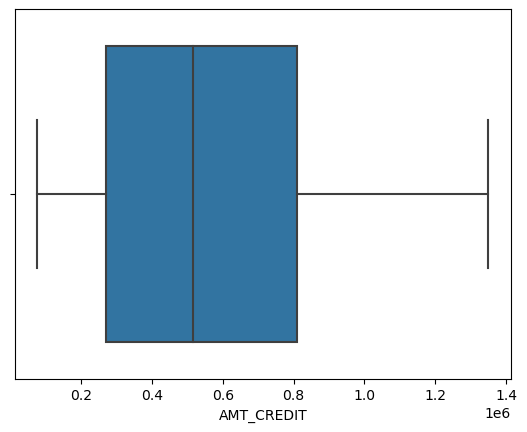

In [106]:
sns.boxplot(df['AMT_CREDIT'])
## AMT_CREDIT column is free from outliers

In [107]:
df['TARGET'].isna().sum()

0

In [108]:
df.shape

(184506, 159)

## Importing RandomForest for feature selection. 
### WE thought it would be good , if we select important feature , so that our model won't overfit.

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
y_train=df['TARGET']
print(y_train.shape)
x_train=df.drop('TARGET',axis=1)

(184506,)


In [111]:
df.shape

(184506, 159)

In [112]:
x_train.shape

(184506, 158)

## Here we are selecting the feature in the function

In [113]:
def selection_feature(x_train,y_train):
    clf=RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=-1)
    clf.fit(x_train,y_train)
    return clf

In [114]:
clf=selection_feature(x_train,y_train)

In [115]:
column_name=x_train.columns

## We are keeping track of all the columns that we dropped and keeping

In [116]:
lst_drop=[]
lst_keep=[]
count=0
for feature in zip(column_name, clf.feature_importances_):
    if(feature[1]==0):
        lst_drop.append(feature[0])
    else:
        lst_keep.append(feature[0])
print(count)

0


In [117]:
print(len(lst_drop))

97


In [118]:
x_train.drop(lst_drop,axis=1,inplace=True)

In [119]:
x_train.shape

(184506, 61)

## Standardizing our columns

In [120]:
# from sklearn.preprocessing import StandardScaler

In [121]:
# def standardization(x_train):
#     scaler=StandardScaler()
#     temp=scaler.fit_transform(x_train)
#     return temp

In [122]:
# x_train=standardization(x_train)

In [123]:
# x_train=pd.DataFrame(x_train,columns=lst_keep)

In [124]:
# x_train.describe()

In [125]:
from imblearn.over_sampling import RandomOverSampler

In [126]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomOverSampler(random_state=42)
x_rus,y_rus=rus.fit_resample(x_train,y_train)


In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier

In [128]:
skf=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)
lst_skf=[]
lr=LogisticRegression()
svc=SVC()
neigh = KNeighborsClassifier(n_neighbors=5)

In [129]:
# def training_model(fold):
#     for train_index, test_index in skf.split(x_train, y_train):
#         x_train_fold, x_test_fold = x_train.iloc[train_index,:], x_train.iloc[test_index,:]
#         y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
#         lr.fit(x_train_fold, y_train_fold)
# #         print(lr.score(x_test_fold, y_test_fold))
#         fold+=1

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,random_state=0,shuffle=True)
x_train.shape
x_test.shape

(84806, 61)

In [132]:
from xgboost import XGBClassifier as xgb

/home/nitin/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [133]:
xgb_model=xgb(objective='binary:logistic',random_state=42)
xgb_model.fit(x_train,y_train)

/home/nitin/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/nitin/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14:54:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [134]:
y_pre=xgb_model.predict(x_test)


In [135]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [136]:
print(confusion_matrix(y_pre,y_test))
print(accuracy_score(y_pre,y_test))

[[32688  7472]
 [ 9871 34775]]
0.7954979600499965


In [137]:
roc_auc_score(y_pre,y_test)

0.7964246940919743

In [ ]:
roc_auc_score(y_pre,y_test)

In [ ]:
test_df=pd.read_csv('test_preprocesseddata.csv')

In [ ]:
test_df.shape

In [ ]:
test_df.head()

In [ ]:
test_df.drop('SK_ID_CURR',axis=1,inplace=True)

In [ ]:
test_df.drop(lst_drop,axis=1,inplace=True)

In [ ]:
test_df.shape

In [ ]:
for col in test_df:
    print(col)
    if col not in lst_keep:
        test_df.drop(col,axis=1,inplace=True)

In [ ]:
test=pd.read_csv('test_data.csv')
SK_ID=test['SK_ID_CURR']

In [ ]:
test_df.shape

In [ ]:
y_pred=xgb_model.predict(test_df)

In [ ]:
type(y_pred)

In [ ]:
y_pred

In [ ]:
y_pred_gbc

In [ ]:
y_pred=y_pred.astype(int)

In [ ]:
y_pred_gbc=y_pred_gbc.astype(int)

In [ ]:
y_pred

In [ ]:
y_pred_gbc

In [ ]:

y_pred=pd.DataFrame(y_pred,columns=['TARGET'])

In [ ]:
y_pred_gbc=pd.DataFrame(y_pred_gbc,columns=['TARGET'])

In [ ]:
df['TARGET'].dtype


In [ ]:
y_pred_gbc['TARGET']

In [ ]:
y_pred

In [ ]:
SK_ID_CURR=pd.DataFrame(SK_ID,columns=['SK_ID_CURR'])

In [ ]:
y_pred.insert(0,'SK_ID_CURR',SK_ID)

In [ ]:
y_pred_gbc.insert(0,'SK_ID_CURR',SK_ID)

In [ ]:
y_pred.head()

In [ ]:
y_pred_gbc.head()

In [ ]:
y_pred.to_csv('y_pred.csv',index=False)

In [ ]:
y_pred_gbc.to_csv('y_pred_gbc.csv',index=False)

In [ ]:
y_pred.shape

In [ ]:
label=pd.read_csv('y_pred.csv')

In [ ]:
label.head()

In [ ]:
label['TARGET'].nunique()

In [ ]:
label.shape

In [ ]:
sample=pd.read_csv('sample_solutions.csv')

In [ ]:
sample.shape

In [ ]:
sample.head()

In [ ]:
from sklearn.metrics import auc